# Using Grayscale Images Without Meta Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Loading Dataset
df = pd.read_csv("hmnist_28_28_L.csv")
meta_data = pd.read_csv("HAM10000_metadata.csv")

# Getting Labels
all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
meta_attributes = meta_data[["dx_type", "age", "sex", "localization"]]
# print(f"{meta_attributes=}")
image_name = meta_data['image_id']

df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")
df_with_meta = pd.concat([df_without_label, meta_attributes], axis=1)
print(f"{df_with_meta=}")
pixel_columns = df_without_label.columns

cancer_count = sum(labels == True)
noncancer_count = sum(labels == False)
# print("Cancer Instances:", cancer_count)
# print("Non-Cancer Instances:", noncancer_count)
# df


df_with_meta=       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0778  pixel0779  \
0     

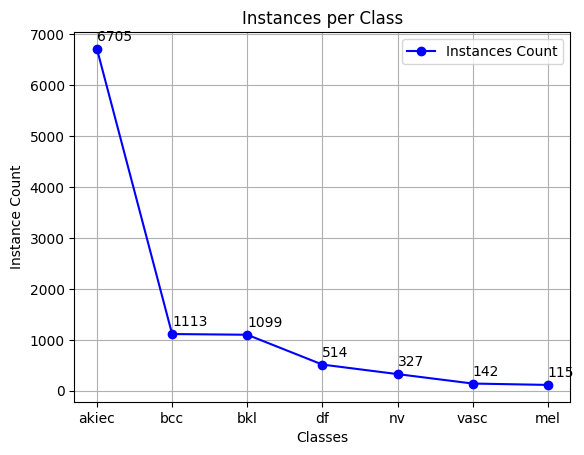

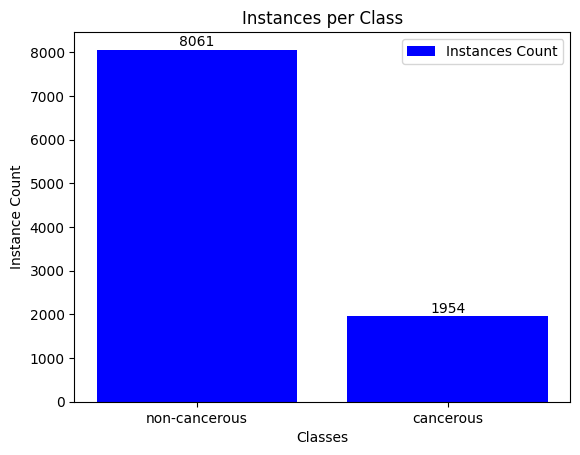

In [2]:
unique_classes_count = all_labels.value_counts()
unique_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
plt.plot(unique_classes,
         unique_classes_count, marker='o', linestyle='-', color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+100, f'{y_coord}', ha='left', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(True)
plt.show()

unique_classes_count = [noncancer_count, cancer_count]
unique_classes = ['non-cancerous', 'cancerous']
plt.bar(unique_classes,
        [noncancer_count, cancer_count], color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+20, f'{y_coord}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(False)
plt.show()

side_length=28
[9810 9647 9866  399 4155 2368 4887 1146 7162]


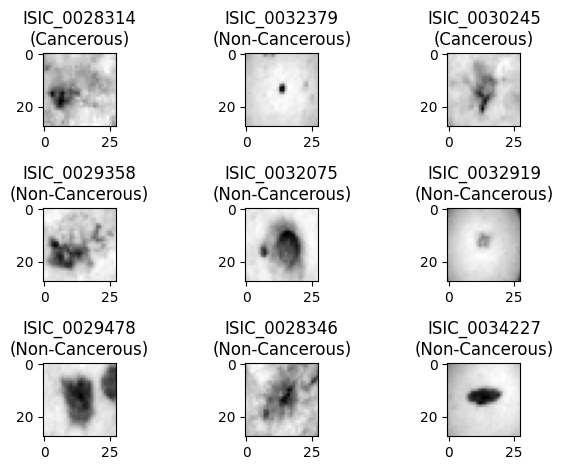

In [3]:
rows = 3
cols = 3
plotNo = 0

side_length = int((len(df_without_label.columns))**0.5)
print(f"{side_length=}")

def plotImage(index):
    global plotNo
    plt.subplot(rows, cols, plotNo+1)
    value = df_without_label[pixel_columns][index:index+1].values[0]

    # red_values = (value[0:2352:3]).reshape(28, 28)
    # green_values = value[1:2352:3].reshape(28, 28)
    # blue_values = value[2:2352:3].reshape(28, 28)
    # print(f"{blue_values[-1]=}")

    # rgb_image = np.stack([red_values, green_values, blue_values], axis=-1)

    plt.title(
        f"{image_name[index]}\n({'Cancerous' if labels[index] else 'Non-Cancerous'})")
    # plt.imshow(rgb_image)
    plt.imshow(value[:side_length*side_length].reshape(side_length, side_length), cmap="gray")
    plotNo += 1


stratified_splitter = StratifiedShuffleSplit(
    n_splits=1, test_size=9, random_state=56)

for train_index, test_index in stratified_splitter.split(df_without_label, labels):
    print(f"{test_index}")
    for index in test_index:
        plotImage(index)

plt.tight_layout()
plt.show()

In [4]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = [], [], [], []

for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=56).split(df_without_label, labels):
    X_train, X_test, y_train, y_test = df_without_label.iloc[
        train_index], df_without_label.iloc[test_index], labels[train_index], labels[test_index]
# print(f"{train_index=}")
# print(f"{test_index=}")


def calc_Confusion_Matrix(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


confusion_matrices = []
roc_auc_arr = []


In [5]:
confusion_matrices.append(calc_Confusion_Matrix(svm.SVC()))
display(confusion_matrices[0])


array([[1610,    2],
       [ 374,   17]], dtype=int64)

In [6]:
confusion_matrices.append(calc_Confusion_Matrix(RandomForestClassifier()))
display(confusion_matrices[1])


array([[1566,   46],
       [ 325,   66]], dtype=int64)

In [7]:
confusion_matrices.append(calc_Confusion_Matrix(
    LogisticRegression(max_iter=3000)))
display(confusion_matrices[2])


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1484,  128],
       [ 321,   70]], dtype=int64)

In [8]:
confusion_matrices.append(calc_Confusion_Matrix(XGBClassifier()))
display(confusion_matrices[3])


array([[1539,   73],
       [ 303,   88]], dtype=int64)

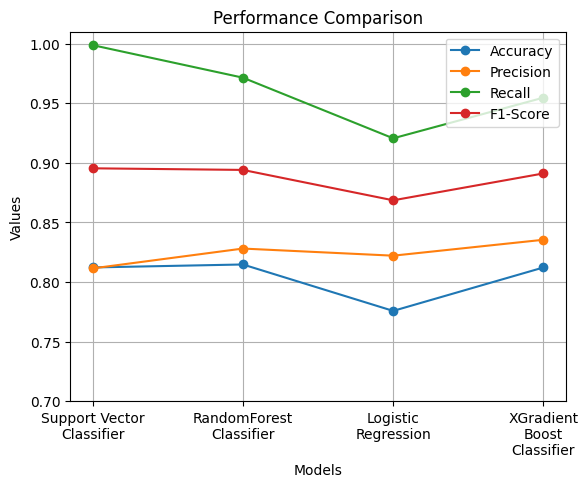

In [9]:
accuracies = [(score[0][0]+score[1][1])/(score[0][0]+score[0]
                                         [1]+score[1][0]+score[1][1]) for score in confusion_matrices]
precisions = [score[0][0]/(score[0][0]+score[1][0])
              for score in confusion_matrices]
recalls = [score[0][0]/(score[0][0]+score[0][1])
           for score in confusion_matrices]
f1scores = [2*p*r/(p+r) for p, r in zip(precisions, recalls)]
models = ['Support Vector\nClassifier', 'RandomForest\nClassifier',
          'Logistic\nRegression', 'XGradient\nBoost\nClassifier']
plt.plot(models, accuracies, marker='o', linestyle='-', label="Accuracy")
# def plot_labels(models, accuracies):
#     for x_coord, y_coord in zip(models, accuracies):
#         plt.text(x_coord, y_coord, "%.2f" % y_coord, ha='left', va='bottom')
# plot_labels(models, accuracies)
plt.plot(models, precisions, marker='o', linestyle='-', label="Precision")
# plot_labels(models, precisions)
plt.plot(models, recalls, marker='o', linestyle='-', label="Recall")
# plot_labels(models, recalls)
plt.plot(models, f1scores, marker='o', linestyle='-', label="F1-Score")
# plot_labels(models, f1scores)
# plt.plot(models, auc_roc_scores, label ="AUC-ROC")
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Performance Comparison')
plt.legend(loc='upper right')
plt.ylim(0.7, 1.01)
plt.grid(True)
plt.show()
